**Méthode d'Invarience Implusionelle**

La méthode d'invariance impulsionnelle est une technique utilisée pour concevoir des filtres numériques à partir de filtres analogiques. Le principe de base consiste à obtenir la réponse impulsionnelle d'un filtre analogique, puis à échantillonner cette réponse impulsionnelle pour obtenir la réponse impulsionnelle du filtre numérique équivalent. Cette méthode préserve la forme de la réponse impulsionnelle, d'où le nom "invariance impulsionnelle".

<ipython-input-1-e0080c5e912d>:36: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, h_d, basefmt=" ", use_line_collection=True)


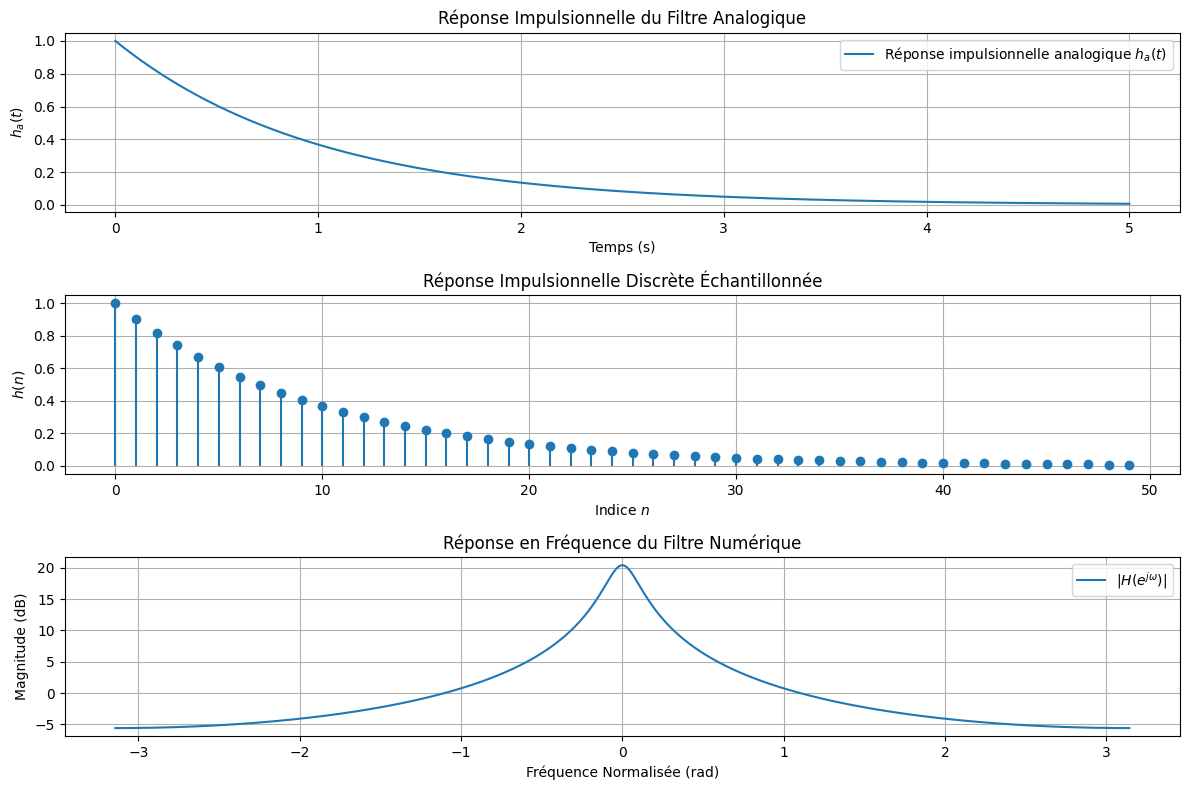

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, dstep, dimpulse

# Paramètres du filtre analogique
omega_c = 1.0  # Fréquence de coupure en rad/s
T = 0.1        # Période d'échantillonnage

# Fonction de transfert du filtre analogique
H_a = lti([omega_c], [1, omega_c])

# 1. Réponse impulsionnelle analogique
t = np.linspace(0, 5, 1000)  # Temps continu
t_out, h_a_t = H_a.impulse(T=t)  # Réponse impulsionnelle

# 2. Réponse impulsionnelle discrète échantillonnée
n = np.arange(0, 50)          # Indices de temps discrets
h_d = omega_c * np.exp(-omega_c * n * T)  # Réponse discrète

# 3. Fonction de transfert numérique H(z) calculée
z = np.exp(1j * np.linspace(-np.pi, np.pi, 512))  # Axe des fréquences
H_z = omega_c / (1 - np.exp(-omega_c * T) * z**-1)  # H(z) numérique

# Plotting the Analog Impulse Response
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t_out, h_a_t, label='Réponse impulsionnelle analogique $h_a(t)$')
plt.title('Réponse Impulsionnelle du Filtre Analogique')
plt.xlabel('Temps (s)')
plt.ylabel('$h_a(t)$')
plt.grid(True)
plt.legend()

# Plotting the Discrete Impulse Response
plt.subplot(3, 1, 2)
plt.stem(n, h_d, basefmt=" ", use_line_collection=True)
plt.title('Réponse Impulsionnelle Discrète Échantillonnée')
plt.xlabel('Indice $n$')
plt.ylabel('$h(n)$')
plt.grid(True)

# Plotting the Frequency Response of the Digital Filter
plt.subplot(3, 1, 3)
plt.plot(np.angle(z), 20 * np.log10(abs(H_z)), label='$|H(e^{j\omega})|$')
plt.title('Réponse en Fréquence du Filtre Numérique')
plt.xlabel('Fréquence Normalisée (rad)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Réponse Impulsionnelle du Filtre Analogique :

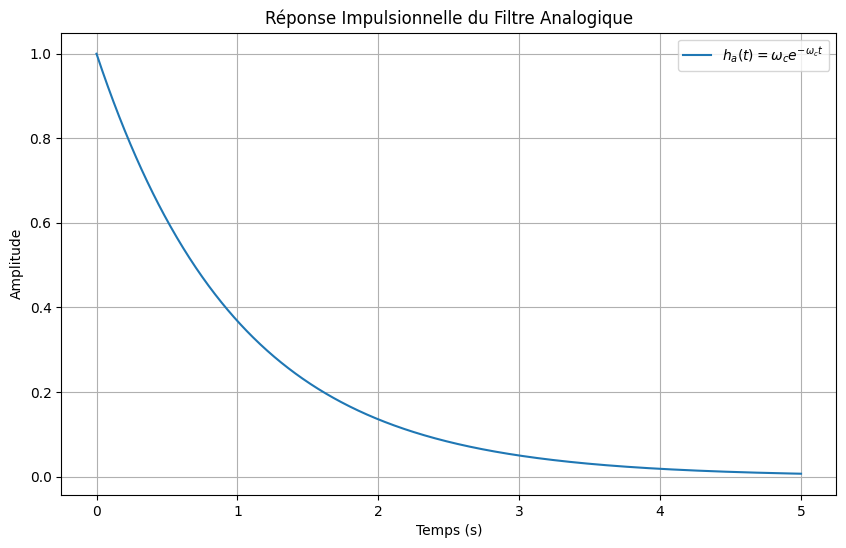

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
omega_c = 1  # Fréquence de coupure
t = np.linspace(0, 5, 1000)  # Axe du temps
t_out, h_a_t = H_a.impulse(T=t)  # Réponse impulsionnelle
# Réponse impulsionnelle analogique
h_a = omega_c * np.exp(-omega_c * t)

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(t_out, h_a_t, label=r'$h_a(t) = \omega_c e^{-\omega_c t}$')
plt.title('Réponse Impulsionnelle du Filtre Analogique')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


Échantillonnage de la Réponse Impulsionnelle :
Échantillonnons la réponse impulsionnelle avec un intervalle d'échantillonnage
T
s
=
1
T
s
​
 =1

<ipython-input-3-5338cd68c65b>:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, h_d, basefmt=" ", use_line_collection=True, label=r'$h_d[n] = \omega_c e^{-\omega_c n T_s}$')


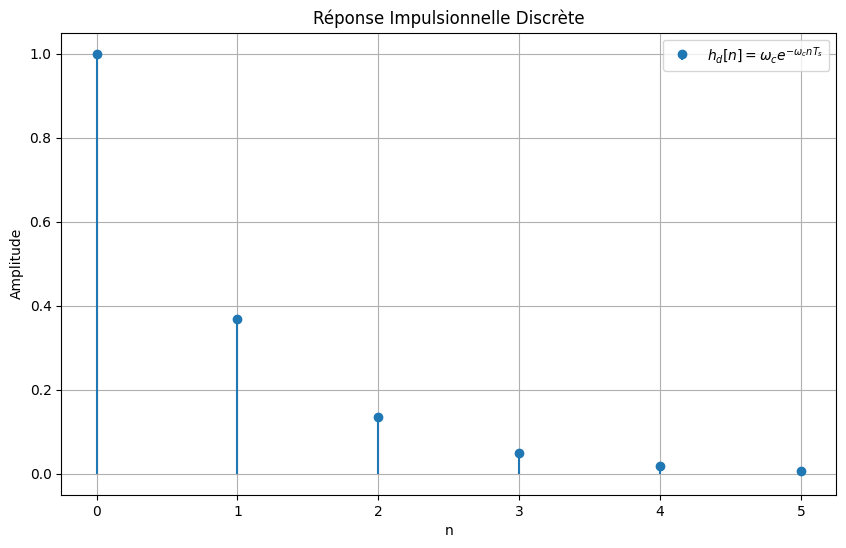

In [3]:
# Échantillonnage
Ts = 1  # Période d'échantillonnage
n = np.arange(0, 6)  # Index des échantillons
h_d = omega_c * np.exp(-omega_c * n * Ts)

# Tracé
plt.figure(figsize=(10, 6))
plt.stem(n, h_d, basefmt=" ", use_line_collection=True, label=r'$h_d[n] = \omega_c e^{-\omega_c n T_s}$')
plt.title('Réponse Impulsionnelle Discrète')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


Réponse en Fréquence du Filtre Numérique :
Utilisons la fonction de transfert numérique obtenue pour visualiser la réponse en fréquence du filtre discret

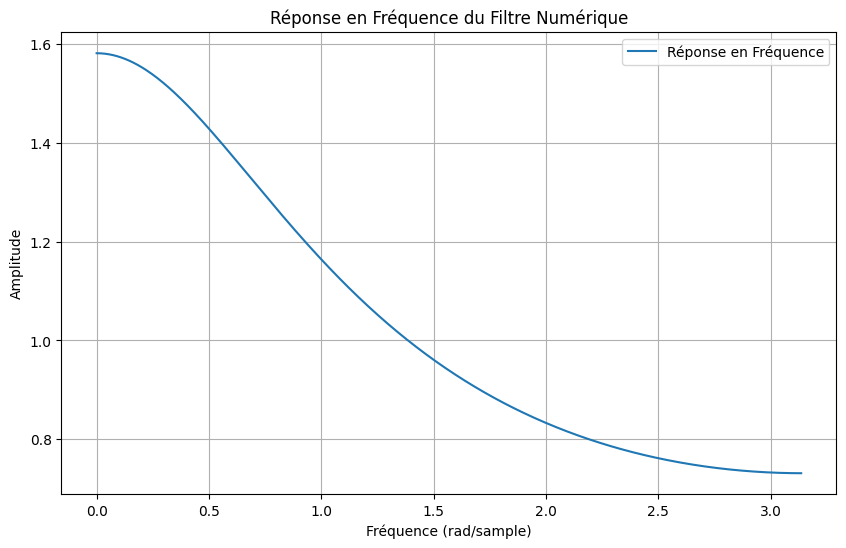

In [4]:
from scipy.signal import freqz

# Fonction de transfert numérique
b = [omega_c]  # Numérateur
a = [1, -np.exp(-omega_c * Ts)]  # Dénominateur

# Calcul et tracé de la réponse en fréquence
w, h = freqz(b, a, worN=512)

plt.figure(figsize=(10, 6))
plt.plot(w, np.abs(h), label='Réponse en Fréquence')
plt.title('Réponse en Fréquence du Filtre Numérique')
plt.xlabel('Fréquence (rad/sample)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


Cet exemple montre le problème de repliement fréquentielle

---



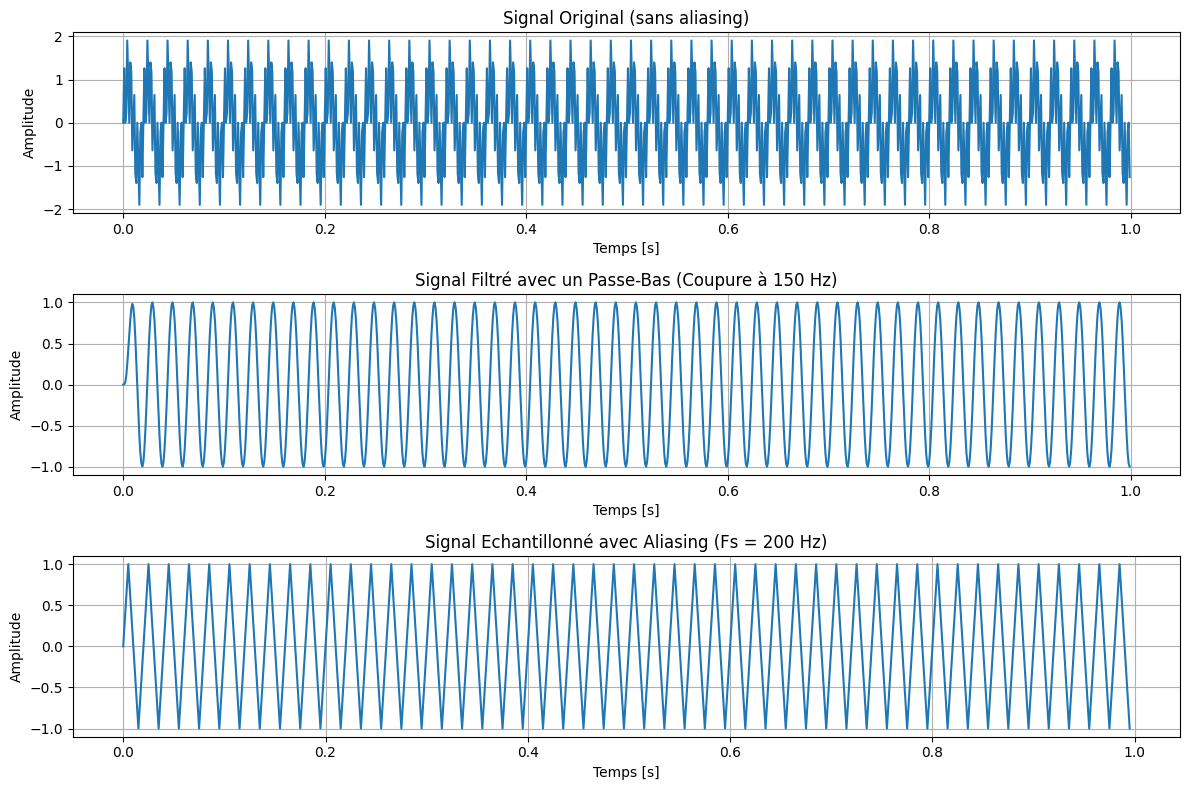

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# Paramètres du filtre passe-bas
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Paramètres de simulation
fs = 1000  # Fréquence d'échantillonnage (Hz)
T = 1.0  # Durée (s)
n = int(T * fs)  # Nombre d'échantillons
t = np.linspace(0, T, n, endpoint=False)

# Générer un signal composé de deux fréquences : une dans la bande et une hors bande
f1 = 50.0  # Fréquence dans la bande
f2 = 300.0  # Fréquence hors bande (supérieure à la fréquence de Nyquist)
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Filtre passe-bas
cutoff = 150.0  # Fréquence de coupure du filtre
filtered_signal = butter_lowpass_filter(signal, cutoff, fs, order=6)

# Réduire la fréquence d'échantillonnage pour simuler le repliement (aliasing)
fs_alias = 200  # Nouvelle fréquence d'échantillonnage inférieure à 2*f2
n_alias = int(T * fs_alias)
t_alias = np.linspace(0, T, n_alias, endpoint=False)
signal_alias = np.sin(2 * np.pi * f1 * t_alias) + np.sin(2 * np.pi * f2 * t_alias)

# Tracé du signal original, du signal filtré, et du signal échantillonné
plt.figure(figsize=(12, 8))

# Signal original
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Signal Original (50 Hz et 300 Hz)')
plt.title('Signal Original (sans aliasing)')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Signal filtré
plt.subplot(3, 1, 2)
plt.plot(t, filtered_signal, label='Signal Filtré (Passe-Bas)')
plt.title('Signal Filtré avec un Passe-Bas (Coupure à 150 Hz)')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Signal échantillonné avec aliasing
plt.subplot(3, 1, 3)
plt.plot(t_alias, signal_alias, label='Signal Echantillonné avec Repliement (Aliasing)')
plt.title('Signal Echantillonné avec Aliasing (Fs = 200 Hz)')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


Cet exemple montre le problème de repliement fréquentielle

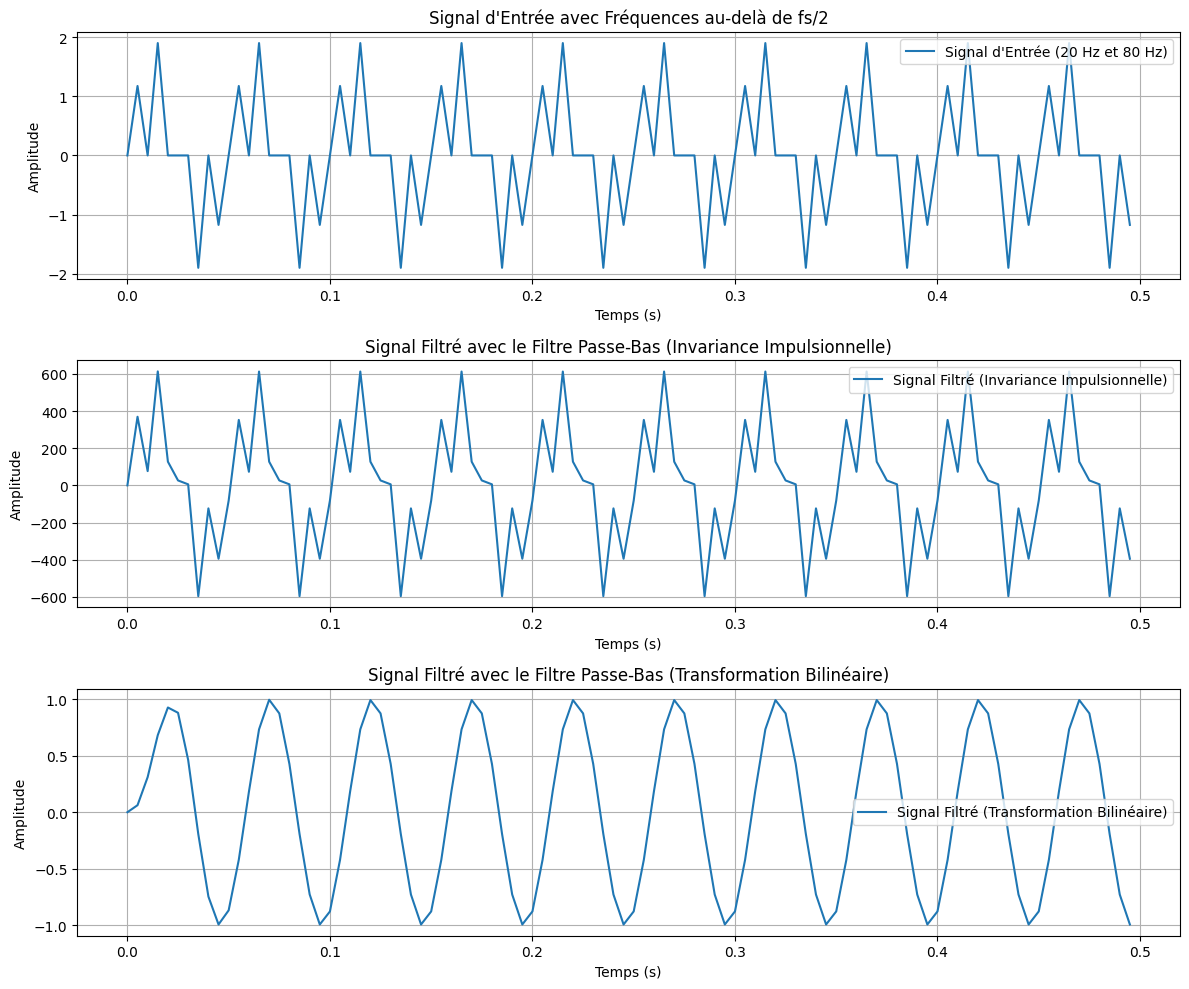

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter, butter

# --- Définition de la fonction butter_lowpass avec transformation bilinéaire ---
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Fréquence de Nyquist
    normal_cutoff = cutoff / nyq  # Normalisation par rapport à la fréquence de Nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# --- Paramètres du filtre numérique ---
cutoff = 50  # Fréquence de coupure (Hz)
order = 5  # Ordre du filtre
fs_signal = 200  # Fréquence d'échantillonnage (Hz)

# --- Génération du signal avec deux fréquences ---
t_signal = np.arange(0, 0.5, 1/fs_signal)
f1 = 20  # Fréquence inférieure à fs/2
f2 = 80  # Fréquence supérieure à fs/2 (fs/2 = 100 Hz)
x = np.sin(2 * np.pi * f1 * t_signal) + np.sin(2 * np.pi * f2 * t_signal)

# --- Filtrage avec le filtre conçu par transformation bilinéaire ---
b_bilinear, a_bilinear = butter_lowpass(cutoff, fs_signal, order)
y_bilinear = lfilter(b_bilinear, a_bilinear, x)

# --- Filtrage avec le filtre conçu par invariance impulsionnelle ---
# Définir le filtre analogique (filtre passe-bas de premier ordre)
omega_c = 2 * np.pi * cutoff  # Pulsation de coupure

# Réponse impulsionnelle analogique
n = np.arange(0, 50)
T_s = 1 / fs_signal  # Période d'échantillonnage
h_d = omega_c * np.exp(-omega_c * n * T_s)  # Réponse impulsionnelle discrète (invariance impulsionnelle)

# Appliquer le filtre invariance impulsionnelle
y_impulse_invariance = lfilter(h_d, 1, x)

# --- Comparaison des signaux filtrés ---

plt.figure(figsize=(12, 10))

# Signal d'entrée
plt.subplot(3, 1, 1)
plt.plot(t_signal, x, label='Signal d\'Entrée (20 Hz et 80 Hz)')
plt.title('Signal d\'Entrée avec Fréquences au-delà de fs/2')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()


# Signal filtré avec invariance impulsionnelle (avec aliasing)
plt.subplot(3, 1, 2)
plt.plot(t_signal, y_impulse_invariance, label='Signal Filtré (Invariance Impulsionnelle)')
plt.title('Signal Filtré avec le Filtre Passe-Bas (Invariance Impulsionnelle)')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Signal filtré avec transformation bilinéaire (sans aliasing)
plt.subplot(3, 1, 3)
plt.plot(t_signal, y_bilinear, label='Signal Filtré (Transformation Bilinéaire)')
plt.title('Signal Filtré avec le Filtre Passe-Bas (Transformation Bilinéaire)')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
